In [1]:
import pyathena as pa
import numpy as np
import matplotlib.pyplot as plt
from for_hii import hii
from pathlib import Path
import yt
import sys
sys.path.insert(0,'/home/cjlee/practice/athena/vis/python')
import athena_read
from astropy.io import ascii
import matplotlib as mpl
from astropy import units as au
from astropy.table import QTable
from astropy import constants as const
from add_fields_hii import add_fields
import yt.units as yu
from mpl_toolkits.axes_grid1 import AxesGrid
path='/data/cjlee/hii/various_nH0_Qi'
datapath=Path(path)
pathlist=list(datapath.glob('hii*'))
for i in range(len(pathlist)):
    print(i,pathlist[i])

0 /data/cjlee/hii/various_nH0_Qi/hii_Q49.0n1.0
1 /data/cjlee/hii/various_nH0_Qi/hii_Q49.0n2.0
2 /data/cjlee/hii/various_nH0_Qi/hii_Q50.0n2.0
3 /data/cjlee/hii/various_nH0_Qi/hii_Q51.0n2.0
4 /data/cjlee/hii/various_nH0_Qi/hii_Q51.0n3.0
5 /data/cjlee/hii/various_nH0_Qi/hii_Q50.0n1.0
6 /data/cjlee/hii/various_nH0_Qi/hii_Q50.0n3.0
7 /data/cjlee/hii/various_nH0_Qi/hii_Q51.0n3.0_nx256_fdt_1.0
8 /data/cjlee/hii/various_nH0_Qi/hii_Q50.0n3.0_nx256_fdt_1.0
9 /data/cjlee/hii/various_nH0_Qi/hii_Q51.0n3.0_nx256_fdt_2.0
10 /data/cjlee/hii/various_nH0_Qi/hii_Q51.0n3.0_nx256_fdt_0.5
11 /data/cjlee/hii/various_nH0_Qi/hii_Q51.0n3.0_fdt_1.0
12 /data/cjlee/hii/various_nH0_Qi/hii_Q51.0n3.0_nx_256_fdt_0.25
13 /data/cjlee/hii/various_nH0_Qi/hii_Q51.0n3.0_nx_256_fdt_0.35
14 /data/cjlee/hii/various_nH0_Qi/hii_Q51.0n3.0_nx_256_fdt_0.30
15 /data/cjlee/hii/various_nH0_Qi/hii_Q51.0n3.0_nx_256_fdt_0.25_mesh_64


In [110]:
m=4
p=hii(pathlist[m],50)
s=p.data_set
ds=p.snap  
add_fields(ds,s)
ad=ds.all_data()
grid=p.grid

yt : [WARNING  ] 2024-04-09 19:27:31,492 Overriding code units: Use this option only if you know that the dataset doesn't define the units correctly or at all.
yt : [INFO     ] 2024-04-09 19:27:31,494 Overriding length_unit: 1.0 pc.
yt : [INFO     ] 2024-04-09 19:27:31,495 Overriding time_unit: 0.9777922216807892 Myr.
yt : [INFO     ] 2024-04-09 19:27:31,496 Overriding mass_unit: 0.024724055685272243 Msun.
yt : [WARNING  ] 2024-04-09 19:27:31,497 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2024-04-09 19:27:31,541 Parameters: current_time              = 0.75001055
yt : [INFO     ] 2024-04-09 19:27:31,542 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2024-04-09 19:27:31,543 Parameters: domain_left_edge          = [-17.67099953 -17.67099953 -17.67099953]
yt : [INFO     ] 2024-04-09 19:27:31,544 Parameters: domain_right_edge         = [17.67099953 17.67099953 17.67099953]
yt : [INFO     ] 2024-04-09 19:27:31,544 Parameters: cosmological_simulation   = 0


In [7]:
x,y,z=ad['x'],ad['y'],ad['z']
density=ad['density']
#density=ad['rho_hi_dot']
vx,vy,vz=ad['vel1'],ad['vel2'],ad['vel3']
r0=ad['r0']
z0=np.min(np.abs(z))

z_grid=p.grid['z']
den=p.grid['density']


N=s.par['mesh']['nx1']
dn=4
X=np.array([])
Y=np.array([])
VX=np.array([])
VY=np.array([])
x_axis,y_axis=list(set(x[(y==z0)&(z==z0)].to_ndarray())),list(set(y[(x==z0)&(z==z0)].to_ndarray()))
x_axis.sort()
y_axis.sort()
    
x_grid=np.reshape(x[z==z0],(128,128))
y_grid=np.reshape(y[z==z0],(128,128))
vx_grid=np.reshape(vx[z==z0],(128,128))
vy_grid=np.reshape(vy[z==z0],(128,128))
r0_grid=np.reshape(r0[z==z0],(128,128))

for i in range(0,N,dn):
    for j in range(0,N,dn):
        ind=np.where((x==x_axis[i])&(y==y_axis[j])&(z==z0))
        X=np.hstack([X,x[ind]])
        Y=np.hstack([Y,y[ind]])
        VX=np.hstack([VX,vx[ind]])
        VY=np.hstack([VY,vy[ind]])
    


(-19.286239327490332, 19.286239327490332)

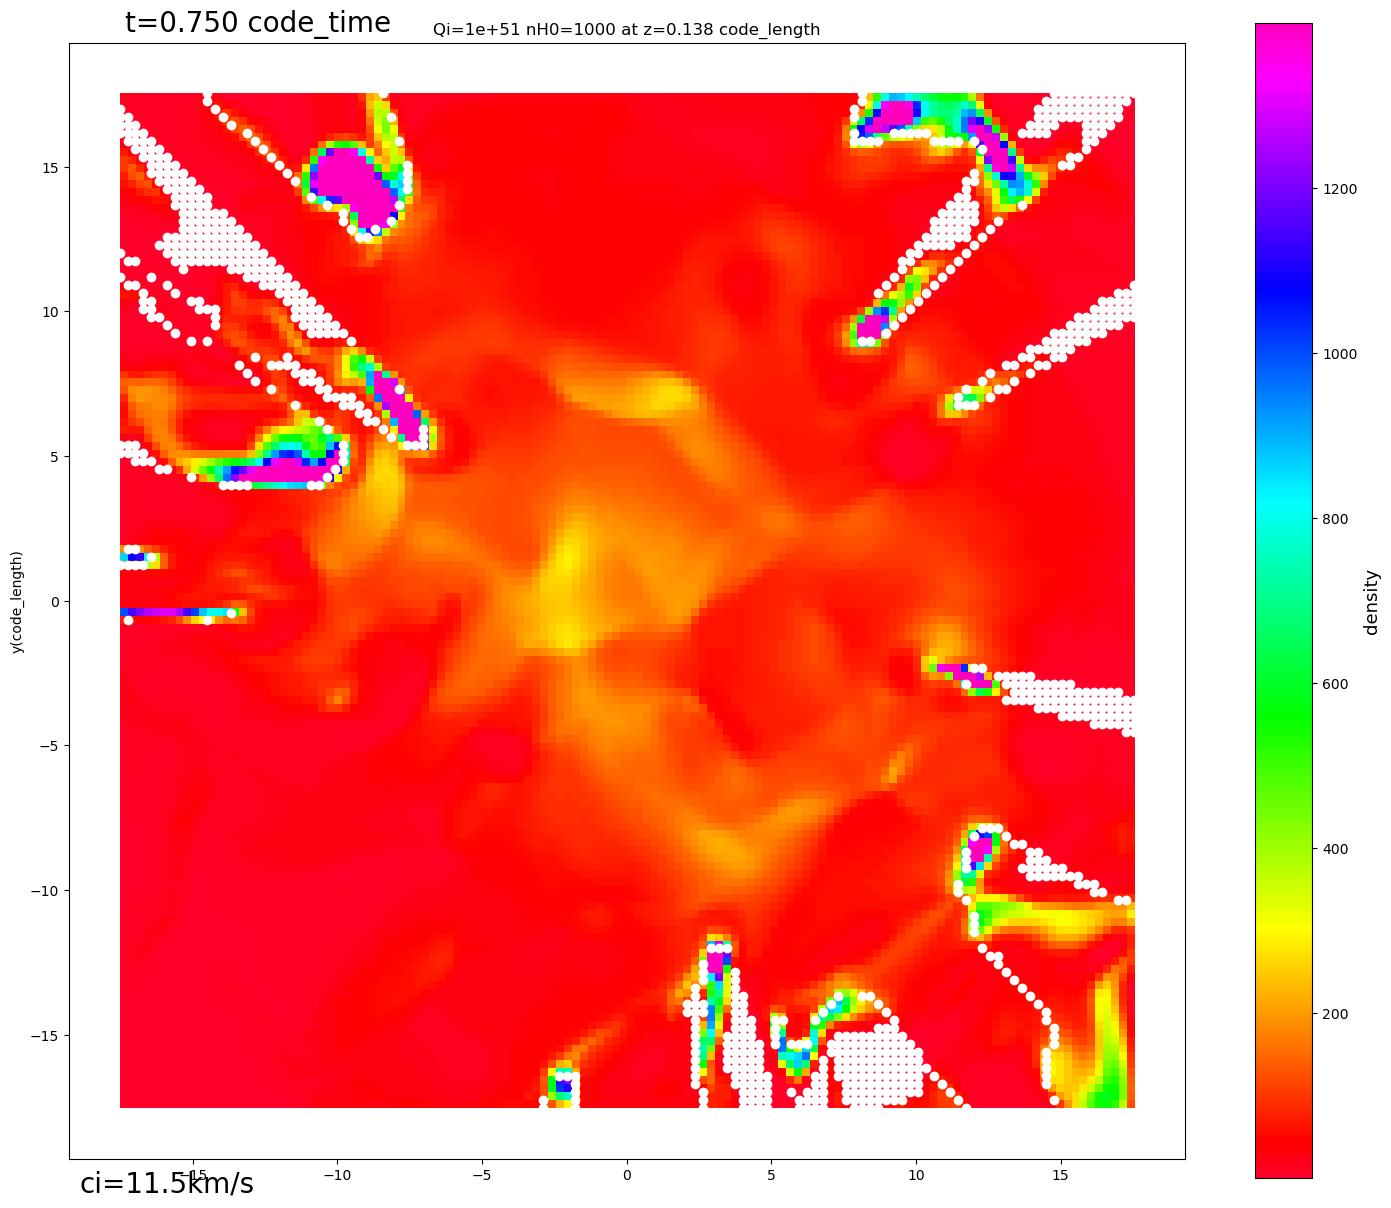

In [17]:
cmap=mpl.cm.gist_rainbow
  
vmax=1*s.par['problem']['nH0']*s.u.muH
vmin=0.001*s.par['problem']['nH0_amb']*s.u.muH

#vmax=1
#vmin=1e-4

norm=mpl.colors.Normalize(vmin=vmin,vmax=vmax)
#norm=mpl.colors.LogNorm(vmin=vmin,vmax=vmax)

colormapping=plt.cm.ScalarMappable(norm=norm,cmap=cmap)
    

x0,x1=-np.max(x_axis)*1.1,np.max(x_axis)*1.1
y0,y1=-np.max(x_axis)*1.1,np.max(x_axis)*1.1
bool_grid=(x_grid>x0)&(x_grid<x1)&(y_grid>y0)&(y_grid<y1)
bool=(x>x0)&(x<x1)&(y>y0)&(y<y1)&(z==z0)
    
BOOL=(X>x0)&(X<x1)&(Y>y0)&(Y<y1)
    

z0_ind=np.where(z_grid==z0)[-1][0]
    
ci=11.5
    
fig=plt.figure(figsize=(18,15))
D=den[:,:,z0_ind]
plt.imshow(np.rot90(D,1),extent=[np.min(x_axis),np.max(x_axis),np.min(y_axis),np.max(y_axis)],norm=norm,cmap=cmap)

#plt.scatter(x[z==z0],y[z==z0],c=density[z==z0],cmap=cmap)

cbar=fig.colorbar(colormapping,ax=plt.gca())
cbar.set_label('density',fontsize=13)
plt.clim(vmin,vmax)
    #plt.pcolormesh(x[z==z0],y[z==z0],density[z==z0],norm=norm, cmap=cmap)

plt.ylabel('x(code_length)')
plt.ylabel('y(code_length)')
Qi=s.par['problem']['Qi']
nH0=s.par['problem']['nH0']
plt.title('Qi={} nH0={} at z={:.3f}'.format(Qi,nH0,z0))



    #contour=plt.contour(x_grid,y_grid,r0_grid,levels=[0.5],cmap='Oranges')
    #plt.clabel(contour,inline=True,fontsize=10)
plt.plot(x_grid[bool_grid&(r0_grid<0.9)&(r0_grid>0.1)],y_grid[bool_grid&(r0_grid<0.9)&(r0_grid>0.1)],'wo')
scale=400
#plt.quiver(X[BOOL],Y[BOOL],VX[BOOL],VY[BOOL],scale=scale,color='w')
    
plt.text(0.95*x0+0.05*x1,1.01*y1-0.01*y0,'t={:.3f}'.format(ds.current_time),fontsize=20)
#plt.quiver(0.99*x0+0.01*x1,0.99*y0+0.01*y1,ci,0,scale=scale,color='k')
plt.text(0.99*x0+0.01*x1,1.03*y0-0.03*y1,'ci=11.5km/s',fontsize=20)
plt.xlim(x0,x1)
plt.ylim(y0,y1)

    #axis equal

In [5]:
radius[i],np.sum(ad['rho_hi_dot']*ad['cell_volume']),np.sum(sph['cell_volume']*sph['rho_hi_dot'])*(s.u.mass/s.u.time).value

(30.296192943785073,
 unyt_quantity(-2619427.59895446, 'code_length**3'),
 unyt_quantity(-66233.77889912, 'code_length**3'))

yt : [WARNING  ] 2024-04-09 17:02:03,576 Overriding code units: Use this option only if you know that the dataset doesn't define the units correctly or at all.
yt : [INFO     ] 2024-04-09 17:02:03,577 Overriding length_unit: 1.0 pc.
yt : [INFO     ] 2024-04-09 17:02:03,578 Overriding time_unit: 0.9777922216807892 Myr.
yt : [INFO     ] 2024-04-09 17:02:03,579 Overriding mass_unit: 0.024724055685272243 Msun.
yt : [WARNING  ] 2024-04-09 17:02:03,580 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2024-04-09 17:02:03,643 Parameters: current_time              = 0.300006
yt : [INFO     ] 2024-04-09 17:02:03,644 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2024-04-09 17:02:03,645 Parameters: domain_left_edge          = [-17.67099953 -17.67099953 -17.67099953]
yt : [INFO     ] 2024-04-09 17:02:03,646 Parameters: domain_right_edge         = [17.67099953 17.67099953 17.67099953]
yt : [INFO     ] 2024-04-09 17:02:03,647 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 20

/data/cjlee/hii/various_nH0_Qi/hii_Q51.0n3.0/M_dot_hi_png/M_dot_hi_profile00020.png


yt : [WARNING  ] 2024-04-09 17:02:23,693 Overriding code units: Use this option only if you know that the dataset doesn't define the units correctly or at all.
yt : [INFO     ] 2024-04-09 17:02:23,694 Overriding length_unit: 1.0 pc.
yt : [INFO     ] 2024-04-09 17:02:23,695 Overriding time_unit: 0.9777922216807892 Myr.
yt : [INFO     ] 2024-04-09 17:02:23,697 Overriding mass_unit: 0.024724055685272243 Msun.
yt : [WARNING  ] 2024-04-09 17:02:23,698 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2024-04-09 17:02:23,759 Parameters: current_time              = 0.4500069
yt : [INFO     ] 2024-04-09 17:02:23,760 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2024-04-09 17:02:23,761 Parameters: domain_left_edge          = [-17.67099953 -17.67099953 -17.67099953]
yt : [INFO     ] 2024-04-09 17:02:23,762 Parameters: domain_right_edge         = [17.67099953 17.67099953 17.67099953]
yt : [INFO     ] 2024-04-09 17:02:23,763 Parameters: cosmological_simulation   = 0


/data/cjlee/hii/various_nH0_Qi/hii_Q51.0n3.0/M_dot_hi_png/M_dot_hi_profile00025.png


yt : [WARNING  ] 2024-04-09 17:02:33,405 Overriding code units: Use this option only if you know that the dataset doesn't define the units correctly or at all.
yt : [INFO     ] 2024-04-09 17:02:33,407 Overriding length_unit: 1.0 pc.
yt : [INFO     ] 2024-04-09 17:02:33,408 Overriding time_unit: 0.9777922216807892 Myr.
yt : [INFO     ] 2024-04-09 17:02:33,410 Overriding mass_unit: 0.024724055685272243 Msun.
yt : [WARNING  ] 2024-04-09 17:02:33,411 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2024-04-09 17:02:33,465 Parameters: current_time              = 0.5250063
yt : [INFO     ] 2024-04-09 17:02:33,466 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2024-04-09 17:02:33,467 Parameters: domain_left_edge          = [-17.67099953 -17.67099953 -17.67099953]
yt : [INFO     ] 2024-04-09 17:02:33,468 Parameters: domain_right_edge         = [17.67099953 17.67099953 17.67099953]
yt : [INFO     ] 2024-04-09 17:02:33,469 Parameters: cosmological_simulation   = 0


/data/cjlee/hii/various_nH0_Qi/hii_Q51.0n3.0/M_dot_hi_png/M_dot_hi_profile00030.png


yt : [WARNING  ] 2024-04-09 17:02:42,545 Overriding code units: Use this option only if you know that the dataset doesn't define the units correctly or at all.
yt : [INFO     ] 2024-04-09 17:02:42,546 Overriding length_unit: 1.0 pc.
yt : [INFO     ] 2024-04-09 17:02:42,547 Overriding time_unit: 0.9777922216807892 Myr.
yt : [INFO     ] 2024-04-09 17:02:42,548 Overriding mass_unit: 0.024724055685272243 Msun.
yt : [WARNING  ] 2024-04-09 17:02:42,549 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2024-04-09 17:02:42,603 Parameters: current_time              = 0.60000527
yt : [INFO     ] 2024-04-09 17:02:42,603 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2024-04-09 17:02:42,604 Parameters: domain_left_edge          = [-17.67099953 -17.67099953 -17.67099953]
yt : [INFO     ] 2024-04-09 17:02:42,605 Parameters: domain_right_edge         = [17.67099953 17.67099953 17.67099953]
yt : [INFO     ] 2024-04-09 17:02:42,606 Parameters: cosmological_simulation   = 0


/data/cjlee/hii/various_nH0_Qi/hii_Q51.0n3.0/M_dot_hi_png/M_dot_hi_profile00035.png


yt : [WARNING  ] 2024-04-09 17:02:51,937 Overriding code units: Use this option only if you know that the dataset doesn't define the units correctly or at all.
yt : [INFO     ] 2024-04-09 17:02:51,938 Overriding length_unit: 1.0 pc.
yt : [INFO     ] 2024-04-09 17:02:51,939 Overriding time_unit: 0.9777922216807892 Myr.
yt : [INFO     ] 2024-04-09 17:02:51,940 Overriding mass_unit: 0.024724055685272243 Msun.
yt : [WARNING  ] 2024-04-09 17:02:51,941 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2024-04-09 17:02:51,967 Parameters: current_time              = 0.6750109
yt : [INFO     ] 2024-04-09 17:02:51,968 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2024-04-09 17:02:51,969 Parameters: domain_left_edge          = [-17.67099953 -17.67099953 -17.67099953]
yt : [INFO     ] 2024-04-09 17:02:51,970 Parameters: domain_right_edge         = [17.67099953 17.67099953 17.67099953]
yt : [INFO     ] 2024-04-09 17:02:51,970 Parameters: cosmological_simulation   = 0


/data/cjlee/hii/various_nH0_Qi/hii_Q51.0n3.0/M_dot_hi_png/M_dot_hi_profile00040.png


yt : [WARNING  ] 2024-04-09 17:03:01,048 Overriding code units: Use this option only if you know that the dataset doesn't define the units correctly or at all.
yt : [INFO     ] 2024-04-09 17:03:01,050 Overriding length_unit: 1.0 pc.
yt : [INFO     ] 2024-04-09 17:03:01,051 Overriding time_unit: 0.9777922216807892 Myr.
yt : [INFO     ] 2024-04-09 17:03:01,051 Overriding mass_unit: 0.024724055685272243 Msun.
yt : [WARNING  ] 2024-04-09 17:03:01,052 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2024-04-09 17:03:01,079 Parameters: current_time              = 0.75001055
yt : [INFO     ] 2024-04-09 17:03:01,080 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2024-04-09 17:03:01,081 Parameters: domain_left_edge          = [-17.67099953 -17.67099953 -17.67099953]
yt : [INFO     ] 2024-04-09 17:03:01,082 Parameters: domain_right_edge         = [17.67099953 17.67099953 17.67099953]
yt : [INFO     ] 2024-04-09 17:03:01,083 Parameters: cosmological_simulation   = 0


/data/cjlee/hii/various_nH0_Qi/hii_Q51.0n3.0/M_dot_hi_png/M_dot_hi_profile00045.png


yt : [WARNING  ] 2024-04-09 17:03:10,911 Overriding code units: Use this option only if you know that the dataset doesn't define the units correctly or at all.
yt : [INFO     ] 2024-04-09 17:03:10,912 Overriding length_unit: 1.0 pc.
yt : [INFO     ] 2024-04-09 17:03:10,913 Overriding time_unit: 0.9777922216807892 Myr.
yt : [INFO     ] 2024-04-09 17:03:10,914 Overriding mass_unit: 0.024724055685272243 Msun.
yt : [WARNING  ] 2024-04-09 17:03:10,915 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2024-04-09 17:03:10,949 Parameters: current_time              = 0.8250381
yt : [INFO     ] 2024-04-09 17:03:10,950 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2024-04-09 17:03:10,951 Parameters: domain_left_edge          = [-17.67099953 -17.67099953 -17.67099953]
yt : [INFO     ] 2024-04-09 17:03:10,951 Parameters: domain_right_edge         = [17.67099953 17.67099953 17.67099953]
yt : [INFO     ] 2024-04-09 17:03:10,952 Parameters: cosmological_simulation   = 0


/data/cjlee/hii/various_nH0_Qi/hii_Q51.0n3.0/M_dot_hi_png/M_dot_hi_profile00050.png


yt : [WARNING  ] 2024-04-09 17:03:20,089 Overriding code units: Use this option only if you know that the dataset doesn't define the units correctly or at all.
yt : [INFO     ] 2024-04-09 17:03:20,090 Overriding length_unit: 1.0 pc.
yt : [INFO     ] 2024-04-09 17:03:20,091 Overriding time_unit: 0.9777922216807892 Myr.
yt : [INFO     ] 2024-04-09 17:03:20,092 Overriding mass_unit: 0.024724055685272243 Msun.
yt : [WARNING  ] 2024-04-09 17:03:20,093 Assuming 1.0 = 1.0 K


/data/cjlee/hii/various_nH0_Qi/hii_Q51.0n3.0/M_dot_hi_png/M_dot_hi_profile00055.png


yt : [INFO     ] 2024-04-09 17:03:20,178 Parameters: current_time              = 0.900059
yt : [INFO     ] 2024-04-09 17:03:20,179 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2024-04-09 17:03:20,180 Parameters: domain_left_edge          = [-17.67099953 -17.67099953 -17.67099953]
yt : [INFO     ] 2024-04-09 17:03:20,180 Parameters: domain_right_edge         = [17.67099953 17.67099953 17.67099953]
yt : [INFO     ] 2024-04-09 17:03:20,181 Parameters: cosmological_simulation   = 0


/data/cjlee/hii/various_nH0_Qi/hii_Q51.0n3.0/M_dot_hi_png/M_dot_hi_profile00060.png


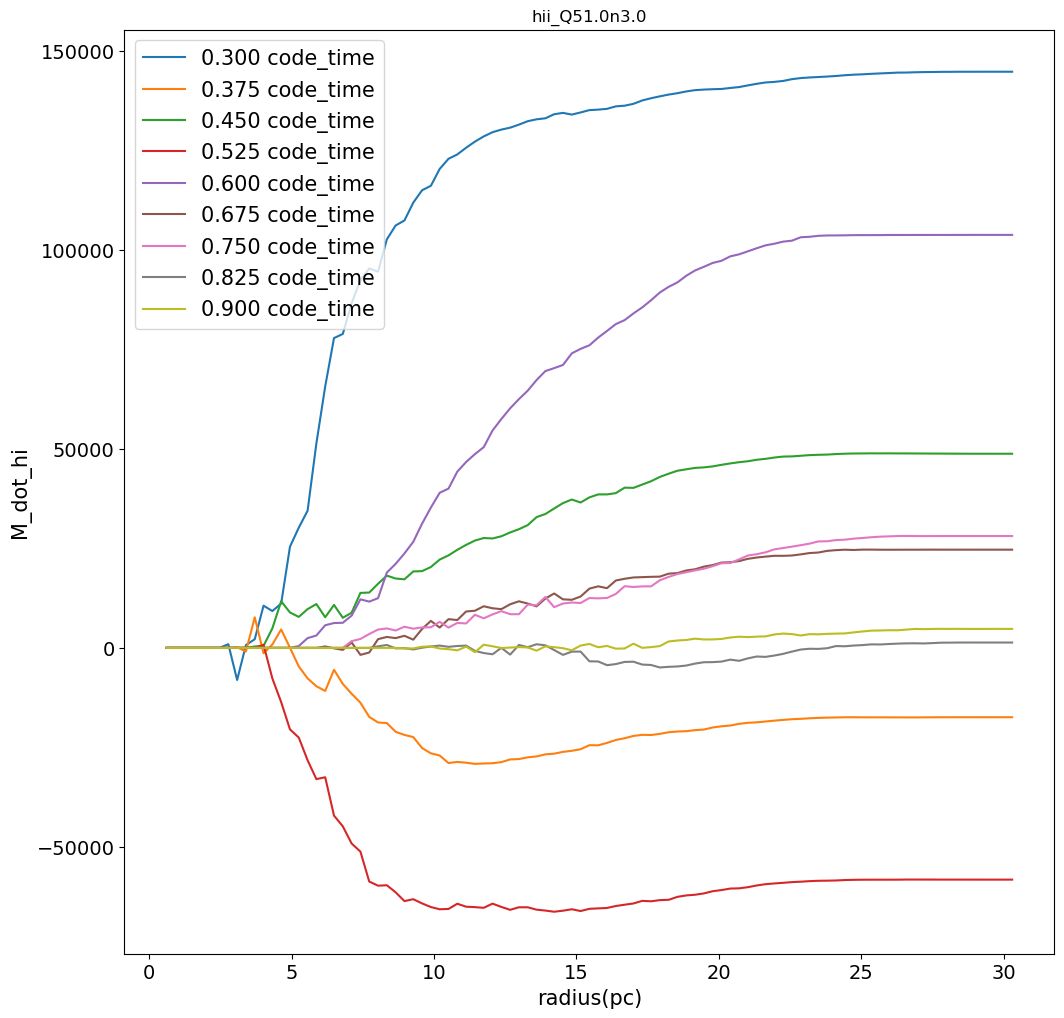

In [75]:
m=4
ind=20
fig=plt.figure(figsize=(12,12))
for num in range(20,61,5):
    a=hii(pathlist[m],num)
    s=a.data_set
    ds=a.snap  
    add_fields(ds,s)
    ad=ds.all_data()
    radius=np.linspace(0,s.par['problem']['r0']*2*np.sqrt(3),100)[2:-1]
    M_dot_profile=np.array([])
    for i in range(len(radius)):
        sph=ds.sphere([0,0,0],(radius[i],'pc'))
        value=np.sum(sph['cell_volume']*sph['rho_hi_dot'])
        M_dot_profile=np.hstack([M_dot_profile,value])
    
    plt.rc('figure', titlesize=30) # figure title 폰트 크기
    plt.rc('axes', labelsize=15)   # x,y축 label 폰트 크기
    plt.rc('xtick', labelsize=14)  # x축 눈금 폰트 크기 
    plt.rc('ytick', labelsize=14)  # y축 눈금 폰트 크기
    plt.rc('legend', fontsize=15)  # 범례 폰트 크기
    
    
    plt.plot(radius,-M_dot_profile*(s.u.mass/s.u.time).value,label='{:.3f}'.format(ds.current_time))
   
    plt.xlabel('radius(pc)')
    plt.ylabel('M_dot_hi')
    #plt.yscale('log')
    
    #plt.yticks([1e-2,1,1e+2,1e+4,1e+6])
    plt.title(str(pathlist[m]).split('/')[-1])

    #plt.ylim(1e-4,1e+11)
    plt.legend(loc=2)
    #if not os.path.exists(str(pathlist[m])+'/M_dot_hi_png'):   
            #os.makedirs(str(pathlist[m])+'/M_dot_hi_png')
    path_png=str(str(pathlist[m])+'/M_dot_hi_png/'+'M_dot_hi_profile'+format(num,'05')+'.png')
    #plt.savefig(path_png)
    print(path_png)

yt : [WARNING  ] 2024-04-05 19:53:03,185 Overriding code units: Use this option only if you know that the dataset doesn't define the units correctly or at all.
yt : [INFO     ] 2024-04-05 19:53:03,186 Overriding length_unit: 1.0 pc.
yt : [INFO     ] 2024-04-05 19:53:03,187 Overriding time_unit: 0.9777922216807892 Myr.
yt : [INFO     ] 2024-04-05 19:53:03,188 Overriding mass_unit: 0.024724055685272243 Msun.
yt : [WARNING  ] 2024-04-05 19:53:03,189 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2024-04-05 19:53:03,234 Parameters: current_time              = 0.300006
yt : [INFO     ] 2024-04-05 19:53:03,234 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2024-04-05 19:53:03,235 Parameters: domain_left_edge          = [-17.67099953 -17.67099953 -17.67099953]
yt : [INFO     ] 2024-04-05 19:53:03,236 Parameters: domain_right_edge         = [17.67099953 17.67099953 17.67099953]
yt : [INFO     ] 2024-04-05 19:53:03,237 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 20

/data/cjlee/hii/various_nH0_Qi/hii_Q51.0n3.0/M_dot_hi_png/M_dot_hi_profile00020.png
/data/cjlee/hii/various_nH0_Qi/hii_Q51.0n3.0/M_dot_hi_png/M_dot_hi_profile00120.png


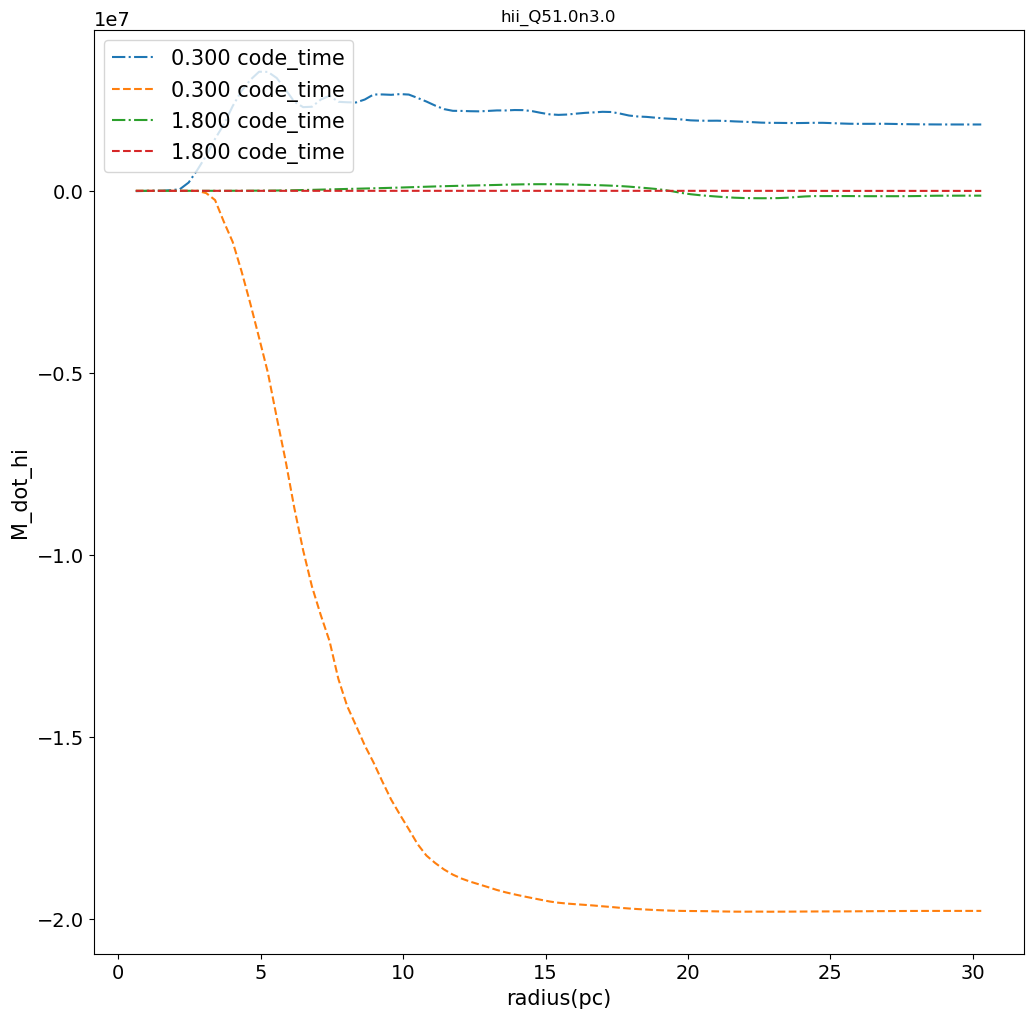

In [4]:
m=4
ind=20
fig=plt.figure(figsize=(12,12))
for num in range(20,121,100):
    a=hii(pathlist[m],num)
    s=a.data_set
    ds=a.snap  
    add_fields(ds,s)
    ad=ds.all_data()
    radius=np.linspace(0,s.par['problem']['r0']*2*np.sqrt(3),100)[2:-1]
    p_dot_profile_ion=np.array([])
    p_dot_profile_neu=np.array([])
    for i in range(len(radius)):
        sph=ds.sphere([0,0,0],(radius[i],'pc'))
        value=np.sum((sph['cell_volume']*sph['rad_pressure_grad'])[sph['r0']<0.5])
        p_dot_profile_ion=np.hstack([p_dot_profile_ion,value])
        value=np.sum((sph['cell_volume']*sph['rad_pressure_grad'])[sph['r0']>0.5])
        p_dot_profile_neu=np.hstack([p_dot_profile_neu,value])
    plt.rc('figure', titlesize=30) # figure title 폰트 크기
    plt.rc('axes', labelsize=15)   # x,y축 label 폰트 크기
    plt.rc('xtick', labelsize=14)  # x축 눈금 폰트 크기 
    plt.rc('ytick', labelsize=14)  # y축 눈금 폰트 크기
    plt.rc('legend', fontsize=15)  # 범례 폰트 크기
    
    
    plt.plot(radius,p_dot_profile_ion,'-.',label='{:.3f}'.format(ds.current_time))
    plt.plot(radius,p_dot_profile_neu,'--',label='{:.3f}'.format(ds.current_time))
    plt.xlabel('radius(pc)')
    plt.ylabel('M_dot_hi')
    #plt.yscale('log')
    
    #plt.yticks([1e-2,1,1e+2,1e+4,1e+6])
    plt.title(str(pathlist[m]).split('/')[-1])

    #plt.ylim(1e-4,1e+11)
    plt.legend(loc=2)
    #if not os.path.exists(str(pathlist[m])+'/M_dot_hi_png'):   
            #os.makedirs(str(pathlist[m])+'/M_dot_hi_png')
    path_png=str(str(pathlist[m])+'/M_dot_hi_png/'+'M_dot_hi_profile'+format(num,'05')+'.png')
    #plt.savefig(path_png)
    print(path_png)

yt : [WARNING  ] 2024-03-29 18:41:38,275 Overriding code units: Use this option only if you know that the dataset doesn't define the units correctly or at all.
yt : [INFO     ] 2024-03-29 18:41:38,277 Overriding length_unit: 1.0 pc.
yt : [INFO     ] 2024-03-29 18:41:38,278 Overriding time_unit: 0.9777922216807892 Myr.
yt : [INFO     ] 2024-03-29 18:41:38,280 Overriding mass_unit: 0.024724055685272243 Msun.
yt : [WARNING  ] 2024-03-29 18:41:38,281 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2024-03-29 18:41:38,349 Parameters: current_time              = 0.30057758
yt : [INFO     ] 2024-03-29 18:41:38,350 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2024-03-29 18:41:38,351 Parameters: domain_left_edge          = [-17.67099953 -17.67099953 -17.67099953]
yt : [INFO     ] 2024-03-29 18:41:38,352 Parameters: domain_right_edge         = [17.67099953 17.67099953 17.67099953]
yt : [INFO     ] 2024-03-29 18:41:38,352 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 

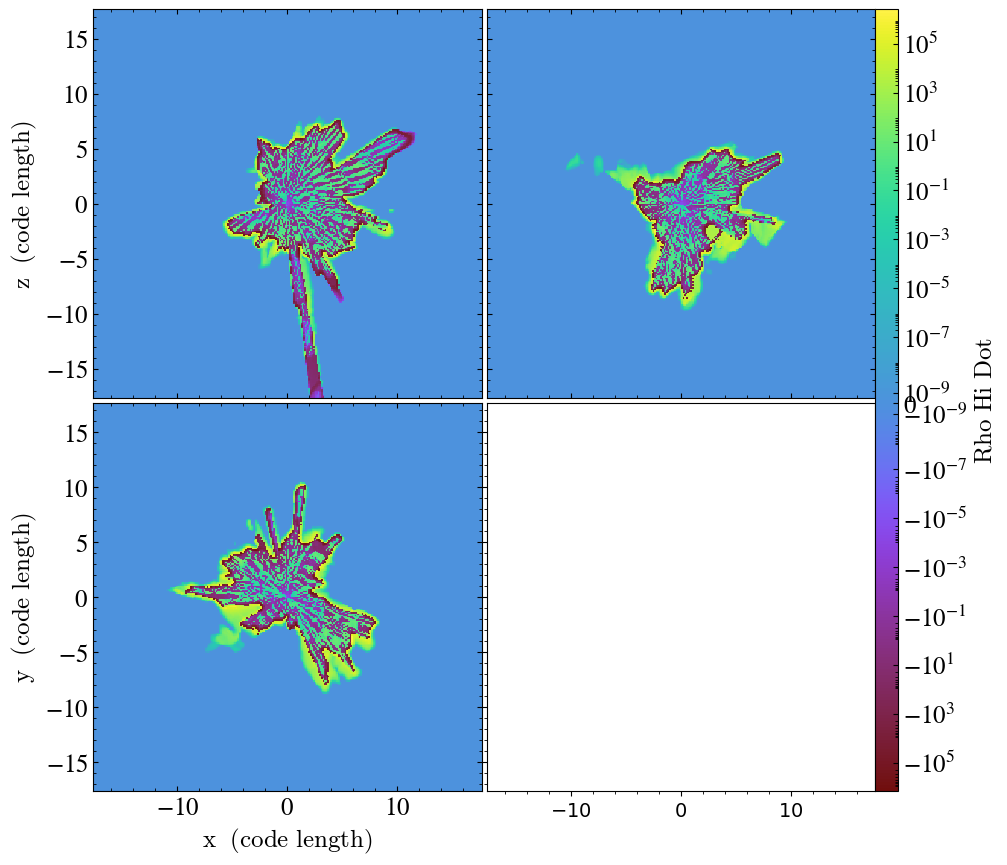

In [6]:

for k in range(ind,ind+1):
    p=hii(pathlist[7],k)
    ds=p.snap
    s=p.data_set
    ad=ds.all_data()
    fig = plt.figure()

    grid = AxesGrid(
        fig,
        (0.075, 0.075, 0.85, 0.85),
        nrows_ncols=(2, 2),
        axes_pad=0.05,
        label_mode="L",
        share_all=True,
        cbar_location="right",
        cbar_mode="single",
        cbar_size="3%",
        cbar_pad="0%",
    )
    xyz=['x','y','z']
    for i in range(3):
        p=yt.SlicePlot(ds,xyz[i],('athena_pp','rho_hi_dot'))
        plot = p.plots[('athena_pp','rho_hi_dot')]
        plot.figure = fig
        plot.axes = grid[i].axes
        plot.cax = grid.cbar_axes[i]
        p.render()
    

In [3]:
def get_data(s, num):
    # num = s.nums[100]
    d = s.load_hdf5(num)
    add_fields(d,s)
    dd=d.all_data()
    u = s.u
    dvol = s.domain['dx'].prod()
    # Derived fields
    dd['radius'] = np.sqrt(dd['x']**2 + dd['y']**2 + dd['z']**2)
    # dd['rho_neu'] = dd['rho']*dd['r0']
    # dd['rho_ion'] = dd['rho']*(1 - dd['r0'])
    
    # Sort cells in ascending order
    idx_ion = dd['r0'] < 0.5
    idx = np.argsort(dd['radius'].flatten())
    
    rr = dict()
    rr['r'] = dd['radius'].flatten()[idx]
    rr['Mion_r'] = (dd['rho'].value*idx_ion).flatten()[idx].cumsum()*dvol*u.mass
    rr['Mneu_r'] = (dd['rho'].value*~idx_ion).flatten()[idx].cumsum()*dvol*u.mass
    rr['Pion_r'] = (dd['rad_pressure_grad'].value*idx_ion).flatten()[idx].cumsum()*dvol
    rr['Pneu_r'] = (dd['rad_pressure_grad'].value*~idx_ion).flatten()[idx].cumsum()*dvol
    
    rr['fV_neu'] = idx_ion.sum()/dd['r0'].size
    rr['fV_ion'] = 1.0 - rr['fV_neu']
    rr['dot_rho_ev'] = -dd['rho_hi_dot'].value.flatten()[idx]
    rr['dot_M_ev'] = rr['dot_rho_ev'].cumsum()*dvol*u.mass/u.time
    rr['time'] = d.current_time.value
    
    return dd, rr

In [4]:
def find_r(x,y,per):
    cut=np.max(y)*per
    region=np.where(y>=cut)
    return np.min(x[region])

yt : [WARNING  ] 2024-04-09 15:53:53,451 Overriding code units: Use this option only if you know that the dataset doesn't define the units correctly or at all.
yt : [INFO     ] 2024-04-09 15:53:53,452 Overriding length_unit: 1.0 pc.
yt : [INFO     ] 2024-04-09 15:53:53,453 Overriding time_unit: 0.9777922216807892 Myr.
yt : [INFO     ] 2024-04-09 15:53:53,454 Overriding mass_unit: 0.024724055685272243 Msun.
yt : [WARNING  ] 2024-04-09 15:53:53,455 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2024-04-09 15:53:53,504 Parameters: current_time              = 2.401207
yt : [INFO     ] 2024-04-09 15:53:53,505 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2024-04-09 15:53:53,506 Parameters: domain_left_edge          = [-17.67099953 -17.67099953 -17.67099953]
yt : [INFO     ] 2024-04-09 15:53:53,507 Parameters: domain_right_edge         = [17.67099953 17.67099953 17.67099953]
yt : [INFO     ] 2024-04-09 15:53:53,508 Parameters: cosmological_simulation   = 0


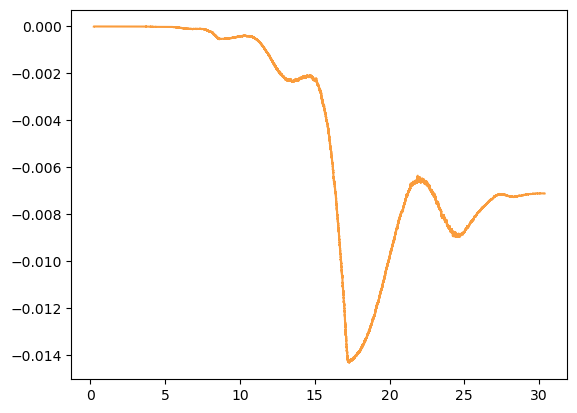

In [5]:

r_evap={'time':np.array([]),'radius':np.array([])}
r_neu={'time':np.array([]),'radius':np.array([])}
r_ion={'time':np.array([]),'radius':np.array([])}
tlim = s.par['time']['tlim']
norm = plt.Normalize(0, tlim)
dd, rr = get_data(s, 160)
cmap = mpl.cm.plasma
plt.plot(rr['r'], rr['dot_M_ev'], c=cmap(norm(rr['time']*s.u.Myr)))


yt : [WARNING  ] 2024-04-09 15:55:09,995 Overriding code units: Use this option only if you know that the dataset doesn't define the units correctly or at all.
yt : [INFO     ] 2024-04-09 15:55:09,996 Overriding length_unit: 1.0 pc.
yt : [INFO     ] 2024-04-09 15:55:09,998 Overriding time_unit: 0.9777922216807892 Myr.
yt : [INFO     ] 2024-04-09 15:55:09,998 Overriding mass_unit: 0.024724055685272243 Msun.
yt : [WARNING  ] 2024-04-09 15:55:09,999 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2024-04-09 15:55:10,051 Parameters: current_time              = 0.15126678
yt : [INFO     ] 2024-04-09 15:55:10,051 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2024-04-09 15:55:10,052 Parameters: domain_left_edge          = [-17.67099953 -17.67099953 -17.67099953]
yt : [INFO     ] 2024-04-09 15:55:10,053 Parameters: domain_right_edge         = [17.67099953 17.67099953 17.67099953]
yt : [INFO     ] 2024-04-09 15:55:10,055 Parameters: cosmological_simulation   = 0


10


yt : [WARNING  ] 2024-04-09 15:55:15,837 Overriding code units: Use this option only if you know that the dataset doesn't define the units correctly or at all.
yt : [INFO     ] 2024-04-09 15:55:15,839 Overriding length_unit: 1.0 pc.
yt : [INFO     ] 2024-04-09 15:55:15,840 Overriding time_unit: 0.9777922216807892 Myr.
yt : [INFO     ] 2024-04-09 15:55:15,841 Overriding mass_unit: 0.024724055685272243 Msun.
yt : [WARNING  ] 2024-04-09 15:55:15,842 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2024-04-09 15:55:15,871 Parameters: current_time              = 0.16582532
yt : [INFO     ] 2024-04-09 15:55:15,872 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2024-04-09 15:55:15,873 Parameters: domain_left_edge          = [-17.67099953 -17.67099953 -17.67099953]
yt : [INFO     ] 2024-04-09 15:55:15,874 Parameters: domain_right_edge         = [17.67099953 17.67099953 17.67099953]
yt : [INFO     ] 2024-04-09 15:55:15,875 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 

20


yt : [WARNING  ] 2024-04-09 15:56:09,233 Overriding code units: Use this option only if you know that the dataset doesn't define the units correctly or at all.
yt : [INFO     ] 2024-04-09 15:56:09,234 Overriding length_unit: 1.0 pc.
yt : [INFO     ] 2024-04-09 15:56:09,235 Overriding time_unit: 0.9777922216807892 Myr.
yt : [INFO     ] 2024-04-09 15:56:09,236 Overriding mass_unit: 0.024724055685272243 Msun.
yt : [WARNING  ] 2024-04-09 15:56:09,236 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2024-04-09 15:56:09,268 Parameters: current_time              = 0.31500763
yt : [INFO     ] 2024-04-09 15:56:09,269 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2024-04-09 15:56:09,270 Parameters: domain_left_edge          = [-17.67099953 -17.67099953 -17.67099953]
yt : [INFO     ] 2024-04-09 15:56:09,270 Parameters: domain_right_edge         = [17.67099953 17.67099953 17.67099953]
yt : [INFO     ] 2024-04-09 15:56:09,271 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 

30


yt : [WARNING  ] 2024-04-09 15:57:02,584 Overriding code units: Use this option only if you know that the dataset doesn't define the units correctly or at all.
yt : [INFO     ] 2024-04-09 15:57:02,586 Overriding length_unit: 1.0 pc.
yt : [INFO     ] 2024-04-09 15:57:02,586 Overriding time_unit: 0.9777922216807892 Myr.
yt : [INFO     ] 2024-04-09 15:57:02,587 Overriding mass_unit: 0.024724055685272243 Msun.
yt : [WARNING  ] 2024-04-09 15:57:02,588 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2024-04-09 15:57:02,616 Parameters: current_time              = 0.46500516
yt : [INFO     ] 2024-04-09 15:57:02,617 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2024-04-09 15:57:02,618 Parameters: domain_left_edge          = [-17.67099953 -17.67099953 -17.67099953]
yt : [INFO     ] 2024-04-09 15:57:02,618 Parameters: domain_right_edge         = [17.67099953 17.67099953 17.67099953]
yt : [INFO     ] 2024-04-09 15:57:02,619 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 

40


yt : [WARNING  ] 2024-04-09 15:57:55,875 Overriding code units: Use this option only if you know that the dataset doesn't define the units correctly or at all.
yt : [INFO     ] 2024-04-09 15:57:55,877 Overriding length_unit: 1.0 pc.
yt : [INFO     ] 2024-04-09 15:57:55,878 Overriding time_unit: 0.9777922216807892 Myr.
yt : [INFO     ] 2024-04-09 15:57:55,879 Overriding mass_unit: 0.024724055685272243 Msun.
yt : [WARNING  ] 2024-04-09 15:57:55,880 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2024-04-09 15:57:55,932 Parameters: current_time              = 0.6150262
yt : [INFO     ] 2024-04-09 15:57:55,933 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2024-04-09 15:57:55,934 Parameters: domain_left_edge          = [-17.67099953 -17.67099953 -17.67099953]
yt : [INFO     ] 2024-04-09 15:57:55,935 Parameters: domain_right_edge         = [17.67099953 17.67099953 17.67099953]
yt : [INFO     ] 2024-04-09 15:57:55,936 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2

50


yt : [WARNING  ] 2024-04-09 15:58:50,049 Overriding code units: Use this option only if you know that the dataset doesn't define the units correctly or at all.
yt : [INFO     ] 2024-04-09 15:58:50,050 Overriding length_unit: 1.0 pc.
yt : [INFO     ] 2024-04-09 15:58:50,051 Overriding time_unit: 0.9777922216807892 Myr.
yt : [INFO     ] 2024-04-09 15:58:50,052 Overriding mass_unit: 0.024724055685272243 Msun.
yt : [WARNING  ] 2024-04-09 15:58:50,053 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2024-04-09 15:58:50,105 Parameters: current_time              = 0.7650257
yt : [INFO     ] 2024-04-09 15:58:50,106 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2024-04-09 15:58:50,107 Parameters: domain_left_edge          = [-17.67099953 -17.67099953 -17.67099953]
yt : [INFO     ] 2024-04-09 15:58:50,108 Parameters: domain_right_edge         = [17.67099953 17.67099953 17.67099953]
yt : [INFO     ] 2024-04-09 15:58:50,109 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2

60


yt : [WARNING  ] 2024-04-09 15:59:44,033 Overriding code units: Use this option only if you know that the dataset doesn't define the units correctly or at all.
yt : [INFO     ] 2024-04-09 15:59:44,034 Overriding length_unit: 1.0 pc.
yt : [INFO     ] 2024-04-09 15:59:44,035 Overriding time_unit: 0.9777922216807892 Myr.
yt : [INFO     ] 2024-04-09 15:59:44,035 Overriding mass_unit: 0.024724055685272243 Msun.
yt : [WARNING  ] 2024-04-09 15:59:44,036 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2024-04-09 15:59:44,073 Parameters: current_time              = 0.9150361
yt : [INFO     ] 2024-04-09 15:59:44,074 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2024-04-09 15:59:44,074 Parameters: domain_left_edge          = [-17.67099953 -17.67099953 -17.67099953]
yt : [INFO     ] 2024-04-09 15:59:44,075 Parameters: domain_right_edge         = [17.67099953 17.67099953 17.67099953]
yt : [INFO     ] 2024-04-09 15:59:44,076 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2

70


yt : [WARNING  ] 2024-04-09 16:00:37,678 Overriding code units: Use this option only if you know that the dataset doesn't define the units correctly or at all.
yt : [INFO     ] 2024-04-09 16:00:37,679 Overriding length_unit: 1.0 pc.
yt : [INFO     ] 2024-04-09 16:00:37,680 Overriding time_unit: 0.9777922216807892 Myr.
yt : [INFO     ] 2024-04-09 16:00:37,681 Overriding mass_unit: 0.024724055685272243 Msun.
yt : [WARNING  ] 2024-04-09 16:00:37,682 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2024-04-09 16:00:37,738 Parameters: current_time              = 1.0650027
yt : [INFO     ] 2024-04-09 16:00:37,739 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2024-04-09 16:00:37,740 Parameters: domain_left_edge          = [-17.67099953 -17.67099953 -17.67099953]
yt : [INFO     ] 2024-04-09 16:00:37,741 Parameters: domain_right_edge         = [17.67099953 17.67099953 17.67099953]
yt : [INFO     ] 2024-04-09 16:00:37,742 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2

80


yt : [WARNING  ] 2024-04-09 16:01:31,749 Overriding code units: Use this option only if you know that the dataset doesn't define the units correctly or at all.
yt : [INFO     ] 2024-04-09 16:01:31,750 Overriding length_unit: 1.0 pc.
yt : [INFO     ] 2024-04-09 16:01:31,751 Overriding time_unit: 0.9777922216807892 Myr.
yt : [INFO     ] 2024-04-09 16:01:31,752 Overriding mass_unit: 0.024724055685272243 Msun.
yt : [WARNING  ] 2024-04-09 16:01:31,753 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2024-04-09 16:01:31,808 Parameters: current_time              = 1.2150308
yt : [INFO     ] 2024-04-09 16:01:31,809 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2024-04-09 16:01:31,810 Parameters: domain_left_edge          = [-17.67099953 -17.67099953 -17.67099953]
yt : [INFO     ] 2024-04-09 16:01:31,811 Parameters: domain_right_edge         = [17.67099953 17.67099953 17.67099953]
yt : [INFO     ] 2024-04-09 16:01:31,812 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2

90


yt : [WARNING  ] 2024-04-09 16:02:33,536 Overriding code units: Use this option only if you know that the dataset doesn't define the units correctly or at all.
yt : [INFO     ] 2024-04-09 16:02:33,563 Overriding length_unit: 1.0 pc.
yt : [INFO     ] 2024-04-09 16:02:33,566 Overriding time_unit: 0.9777922216807892 Myr.
yt : [INFO     ] 2024-04-09 16:02:33,567 Overriding mass_unit: 0.024724055685272243 Msun.
yt : [WARNING  ] 2024-04-09 16:02:33,569 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2024-04-09 16:02:33,641 Parameters: current_time              = 1.3650961
yt : [INFO     ] 2024-04-09 16:02:33,642 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2024-04-09 16:02:33,642 Parameters: domain_left_edge          = [-17.67099953 -17.67099953 -17.67099953]
yt : [INFO     ] 2024-04-09 16:02:33,643 Parameters: domain_right_edge         = [17.67099953 17.67099953 17.67099953]
yt : [INFO     ] 2024-04-09 16:02:33,644 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2

Text(0.5, 0.98, 'Model: hii_Q51.0n3.0')

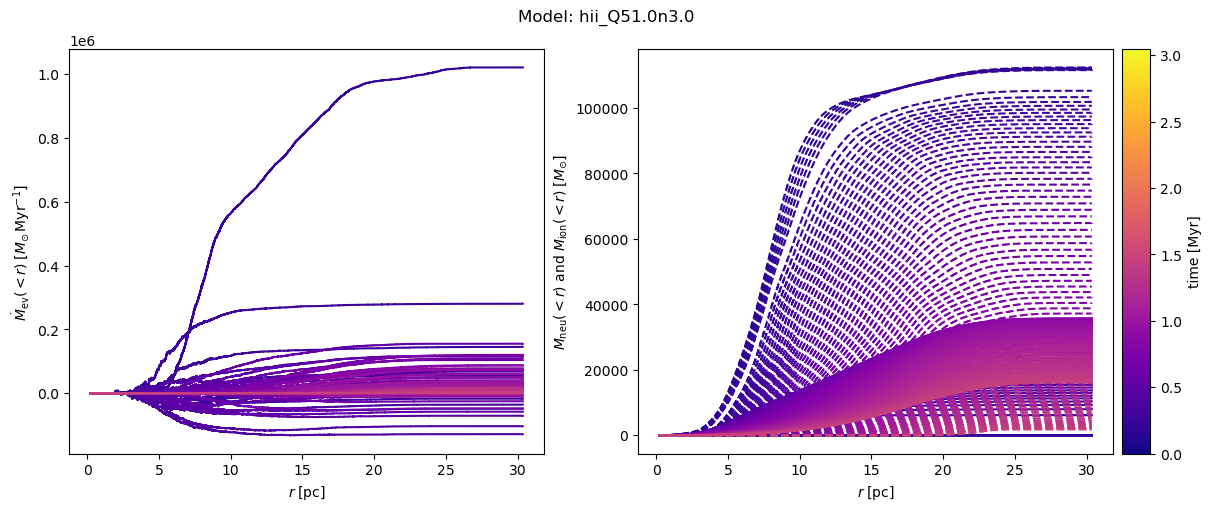

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5), constrained_layout=True,
                         gridspec_kw=dict(width_ratios=[0.5,0.5,0.03]))
r_evap={'time':np.array([]),'radius':np.array([])}
r_neu={'time':np.array([]),'radius':np.array([])}
r_ion={'time':np.array([]),'radius':np.array([])}

tlim = s.par['time']['tlim']
norm = plt.Normalize(0, tlim)
cmap = mpl.cm.plasma
dict_list=[]
for num in s.nums[10:100:1]:
    if num%10==0:
        print(num)
    dd, rr = get_data(s, num)
    plt.sca(axes[0])
    plt.plot(rr['r'], rr['dot_M_ev'], c=cmap(norm(rr['time']*s.u.Myr)))
    dict_list.append(rr)
    r_evap['time']=np.hstack([r_evap['time'],rr['time']])
    r_evap['radius']=np.hstack([r_evap['radius'],find_r(rr['r'],rr['dot_M_ev'],0.95)])
    plt.sca(axes[1])
    l, = plt.plot(rr['r'], rr['Mion_r'], c=cmap(norm(rr['time']*s.u.Myr)))
    plt.plot(rr['r'], rr['Mneu_r'], c=l.get_color(), ls='--')
    # break
    
    r_neu['time']=np.hstack([r_neu['time'],rr['time']])
    r_neu['radius']=np.hstack([r_neu['radius'],find_r(rr['r'],rr['Mneu_r'],0.95)])
    r_ion['time']=np.hstack([r_ion['time'],rr['time']])
    r_ion['radius']=np.hstack([r_ion['radius'],find_r(rr['r'],rr['Mion_r'],0.95)])
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
# sm.set_array([])
plt.colorbar(sm, cax=axes[-1], label='time [Myr]')
plt.setp(axes[0], ylabel=r'$\dot{M}_{\rm ev}(<r)\;[M_{\odot}\,{\rm Myr}^{-1}]$')
plt.setp(axes[1], ylabel=r'$M_{\rm neu}(<r)$ and $M_{\rm ion}(<r)\;[M_{\odot}]$')
plt.setp(axes[0:2], xlabel=r'$r\;[{\rm pc}]$')
plt.suptitle('Model: ' + s.basename)

In [26]:
dict_list[0]

{'r': unyt_array([ 0.23911773,  0.23911773,  0.23911773, ..., 30.36795127,
             30.36795127, 30.36795127], 'code_length'),
 'Mion_r': <Quantity [0., 0., 0., ..., 0., 0., 0.] solMass>,
 'Mneu_r': <Quantity [3.98123152e-01, 4.89918009e-01, 6.79704389e-01, ...,
            1.12405154e+05, 1.12405156e+05, 1.12405156e+05] solMass>,
 'Pion_r': <Quantity [0., 0., 0., ..., 0., 0., 0.] solMass>,
 'Pneu_r': <Quantity [ 6.78357421e-01,  4.45780333e-01,  3.67772625e-01, ...,
            -1.96359299e+04, -1.96359285e+04, -1.96359273e+04] solMass>,
 'fV_neu': 0.0,
 'fV_ion': 1.0,
 'dot_rho_ev': array([-0., -0., -0., ..., -0., -0., -0.]),
 'dot_M_ev': <Quantity [-0., -0., -0., ..., -0., -0., -0.] solMass / Myr>,
 'time': array(0.15126678, dtype=float32)}

In [37]:
len(dict_list)

38

(0.0, 1.01)

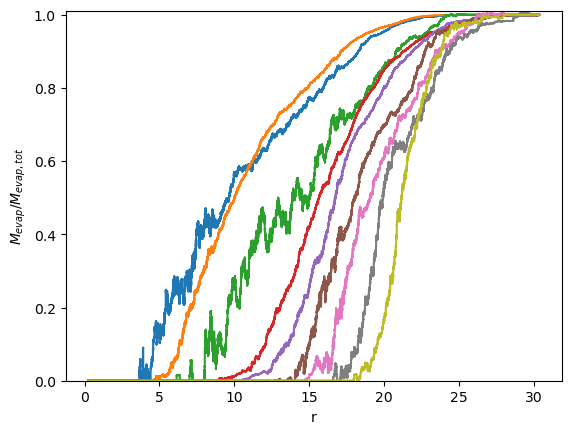

In [7]:
for dd in dict_list[::7]:
    if dd['dot_M_ev'][-1]>0:
        plt.plot(dd['r'],dd['dot_M_ev']/dd['dot_M_ev'][-1],label=str(dd['time']))

plt.xlabel('r')
plt.ylabel('$M_{evap}/M_{evap,tot}$')
#plt.legend()
plt.ylim(0,1.01)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


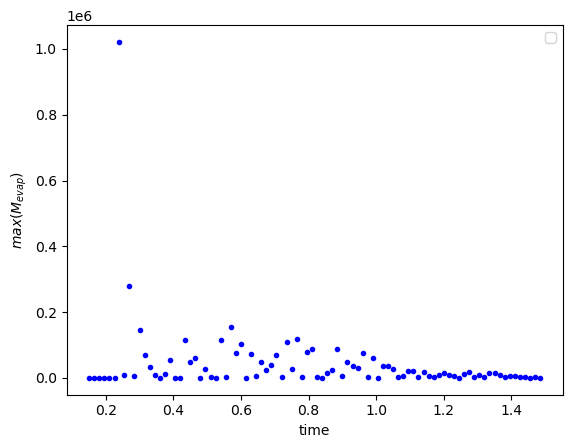

In [8]:
for dd in dict_list:
    plt.plot(dd['time'],np.max(dd['dot_M_ev']),'bo',ms=3)

plt.xlabel('time')
plt.ylabel('$max(M_{evap})$')
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


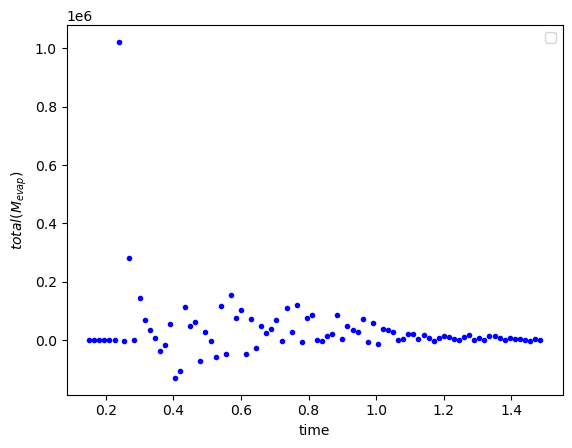

In [9]:
for dd in dict_list:
    plt.plot(dd['time'],dd['dot_M_ev'][-1],'bo',ms=3)

plt.xlabel('time')
plt.ylabel('$total(M_{evap})$')
plt.legend()

/data/cjlee/hii/various_nH0_Qi/hii_Q51.0n3.0_nx256_fdt_0.5


Text(0.5, 1.0, 'hii_Q51.0n3.0_nx256_fdt_0.5')

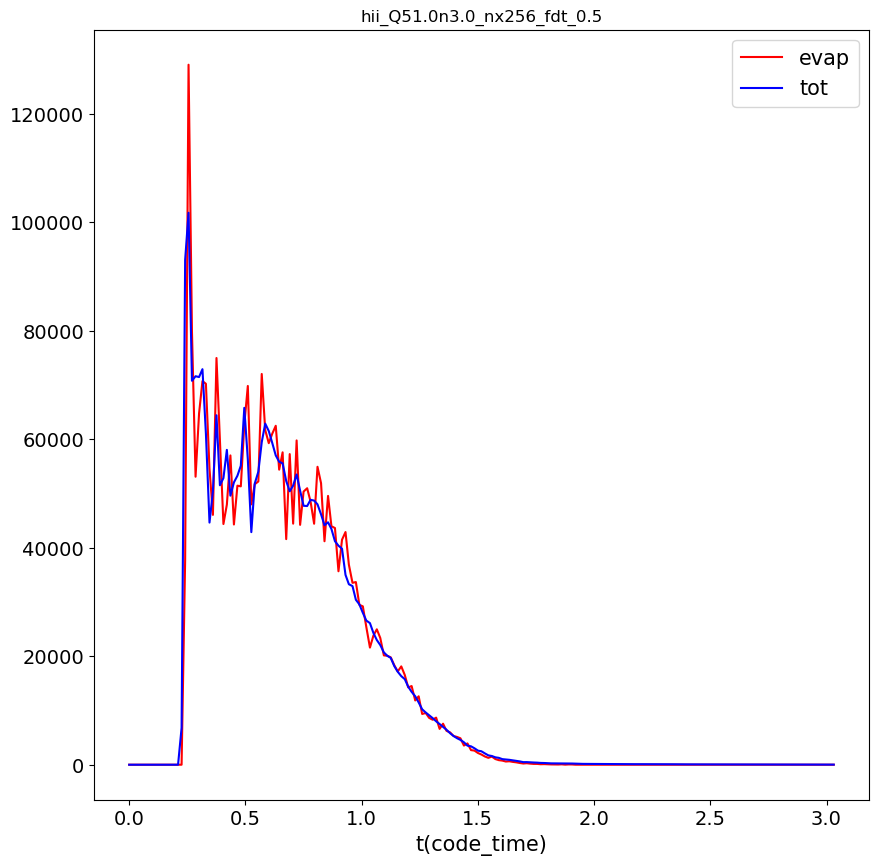

In [108]:
region='total'
i=10
path=str(pathlist[i])
print(path)
s = pa.LoadSim(str(pathlist[i]))
h = pa.read_hst(s.files['hst'])
t1=QTable.read(path+'/hst_in_domain',format='latex')
t2=QTable.read(path+'/outflow_hst',format='latex')
muH=s.par['units']['mean_mass_per_hydrogen']
t=t1['time_'+region]

ej_ion=t2['Mass_ion_'+region]
N_ej=ej_ion*s.u.mass
N_in=t1['Mass_ion_'+region]*s.u.mass
N_dot=(N_in[1:]-N_in[:-1])/(t[1:]-t[:-1])


fig=plt.figure(figsize=(10,10))



#plt.plot(np.array([dd['time'] for dd in dict_list]),np.array([np.max(dd['dot_M_ev']).value for dd in dict_list]),'g',label='max($M_{dot,evap}$)')
#for dd in dict_list:
    #plt.plot(dd['time'],np.max(dd['dot_M_ev']),'ro',ms=3)
#plt.plot(t,N_ej,label='M_ej')
#plt.plot(t[:-1],N_dot,label='dM/dt')
plt.plot(t[:-1],-t1['Mion_evap_total'][:-1]*s.u.mass,'r',label='evap')
plt.plot(t[:-1],N_dot+N_ej[:-1],'b',label='tot')

plt.legend()
plt.xlabel('t(code_time)')
#plt.ylabel('')
plt.title(path.split('/')[-1])


In [48]:
M_in[:-1]

<Quantity [    0.        ,     0.        ,     0.        ,     0.        ,
               0.        ,     0.        ,     0.        ,     0.        ,
               0.        ,     0.        ,     0.        ,     0.        ,
               0.        ,     0.        ,     0.        ,     0.        ,
            6696.72041156,  8551.28533026,  9889.01284431, 10974.65454406,
           11909.00514686, 12763.37832259, 13628.49453726, 14419.42762469,
           15299.59025706, 16094.55962645, 16851.15818266, 17585.22008544,
           18460.85864047, 19341.2647119 , 20182.04132775, 21034.54841077,
           21803.26518958, 22647.95673273, 23440.54442388, 24445.91057948,
           25232.60894217, 26085.80486095, 26932.77243682, 27849.08721599,
           28668.81910249, 29444.8908622 , 30204.42864444, 30969.23330245,
           31665.50559422, 32335.44775628, 32997.11989171, 33524.42129356,
           34054.08283419, 34562.38689867, 34961.37794749, 35320.79414772,
           35597.7186459 

/data/cjlee/hii/various_nH0_Qi/hii_Q51.0n3.0


<>:25: SyntaxWarning: invalid escape sequence '\D'
<>:27: SyntaxWarning: invalid escape sequence '\D'
<>:25: SyntaxWarning: invalid escape sequence '\D'
<>:27: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_120941/103715057.py:25: SyntaxWarning: invalid escape sequence '\D'
  plt.plot(t[:-1],M_in[:-1],label='$\Delta M$')
/tmp/ipykernel_120941/103715057.py:27: SyntaxWarning: invalid escape sequence '\D'
  plt.plot(t[:-1],ej+M_in[:-1],label='total=$\Delta M$+outflow')


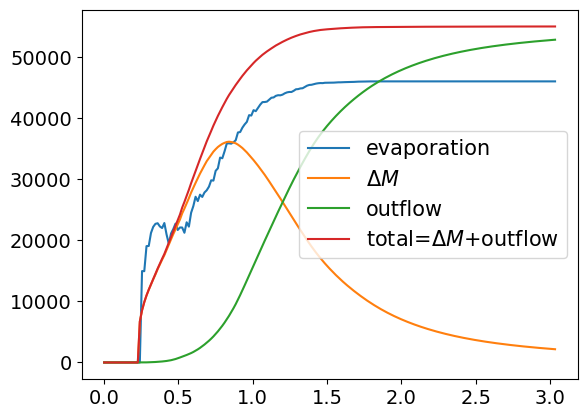

In [103]:
region='total'
i=4
path=str(pathlist[i])
print(path)
s = pa.LoadSim(str(pathlist[i]))
h = pa.read_hst(s.files['hst'])
t1=QTable.read(path+'/hst_in_domain',format='latex')
t2=QTable.read(path+'/outflow_hst',format='latex')
muH=s.par['units']['mean_mass_per_hydrogen']
t=t1['time_'+region]
dt=t[1:]-t[:-1]

ej_ion=t2['Mass_ion_'+region]
M_ej=ej_ion*s.u.mass
M_in=t1['Mass_ion_'+region]*s.u.mass.value
M_dot_evap=t1['Mion_evap_total']*s.u.mass

M_evap=np.array([np.sum(-M_dot_evap[:k]*dt[:k]).value for k in range(len(dt))])
dM_in=(M_in[-2]-M_in[0])
ej=np.array([np.sum(M_ej[:k]*dt[:k]).value for k in range(len(dt))])

#fig=plt.figure(figsize=(10,10))

plt.plot(t[:-1],M_evap,label='evaporation')
plt.plot(t[:-1],M_in[:-1],label='$\Delta M$')
plt.plot(t[:-1],ej,label='outflow')
plt.plot(t[:-1],ej+M_in[:-1],label='total=$\Delta M$+outflow')
plt.legend()

In [ ]:
region='total'
i=4
path=str(pathlist[i])
print(path)
s = pa.LoadSim(str(pathlist[i]))
h = pa.read_hst(s.files['hst'])
t1=QTable.read(path+'/hst_in_domain',format='latex')
t2=QTable.read(path+'/outflow_hst',format='latex')
muH=s.par['units']['mean_mass_per_hydrogen']
t=t1['time_'+region]

ej_ion=t2['Mass_ion_'+region]
N_ej=ej_ion*s.u.mass.to('g').value/muH
N_in=t1['Mass_ion_'+region]*s.u.mass.to('g').value/muH
N_dot=(N_in[1:]-N_in[:-1])/(t[1:]-t[:-1])
DNDt=(t1['Iph_'+region]-t1['Rec_'+region])/s.par['units']['time_cgs']

fig=plt.figure(figsize=(5,5))


plt.plot(t,N_ej,label='N_ej')
plt.plot(t[:-1],N_dot,label='dN/dt')
plt.plot(t[:-1],N_dot+N_ej[:-1],label='tot')

plt.legend()
plt.xlabel('t(code_time)')
#plt.ylabel('')
plt.title(path.split('/')[-1])


In [16]:
r_evap['radius']

unyt_array([ 0.23911773,  0.23911773, 17.27118719,  4.10233854,
            20.43722297,  3.89255457, 20.55624507, 22.84669461,
            23.4688902 , 13.42115918, 26.42981115, 12.7392386 ,
            24.50188679, 16.76042994, 25.12557318, 24.97340164,
            26.18057026, 25.1589274 , 23.43638367, 24.53919578,
            25.43617743, 27.32611043, 24.40836482, 25.82286936,
            25.67186146, 26.23583888, 25.91128644, 27.03158654,
            24.69404316, 25.13770711,  1.19558863, 24.90615162,
            24.77725837, 24.58885303, 24.64769109, 24.02111827,
            23.62752574, 24.1382604 ], '(dimensionless)')

Text(0, 0.5, 'radius(code_length)')

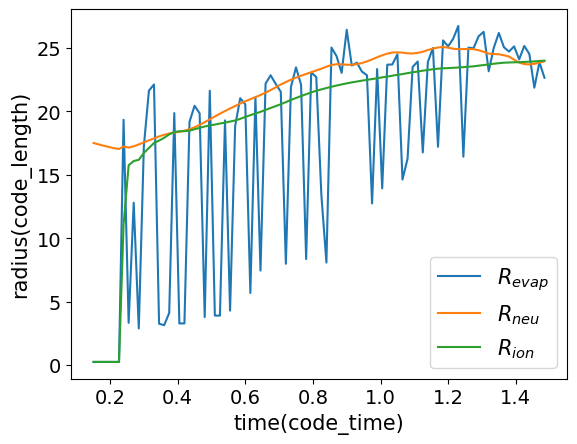

In [85]:
plt.plot(r_evap['time'],r_evap['radius'],label='$R_{evap}$')
plt.plot(r_neu['time'],r_neu['radius'],label='$R_{neu}$')
plt.plot(r_ion['time'],r_ion['radius'],label='$R_{ion}$')
plt.legend()
plt.xlabel('time(code_time)')
plt.ylabel('radius(code_length)')

In [5]:
m=4
p=hii(pathlist[m],50)
s=p.data_set
ds=p.snap  
add_fields(ds,s)
ad=ds.all_data()
grid=p.grid

yt : [WARNING  ] 2024-04-06 18:52:05,471 Overriding code units: Use this option only if you know that the dataset doesn't define the units correctly or at all.
yt : [INFO     ] 2024-04-06 18:52:05,473 Overriding length_unit: 1.0 pc.
yt : [INFO     ] 2024-04-06 18:52:05,474 Overriding time_unit: 0.9777922216807892 Myr.
yt : [INFO     ] 2024-04-06 18:52:05,475 Overriding mass_unit: 0.024724055685272243 Msun.
yt : [WARNING  ] 2024-04-06 18:52:05,476 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2024-04-06 18:52:05,567 Parameters: current_time              = 0.75001055
yt : [INFO     ] 2024-04-06 18:52:05,568 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2024-04-06 18:52:05,569 Parameters: domain_left_edge          = [-17.67099953 -17.67099953 -17.67099953]
yt : [INFO     ] 2024-04-06 18:52:05,570 Parameters: domain_right_edge         = [17.67099953 17.67099953 17.67099953]
yt : [INFO     ] 2024-04-06 18:52:05,571 Parameters: cosmological_simulation   = 0


In [116]:
s.u.length/s.u.time**2

<Quantity 1.04594017 pc / Myr2>

yt : [WARNING  ] 2024-04-09 19:49:47,521 Overriding code units: Use this option only if you know that the dataset doesn't define the units correctly or at all.
yt : [INFO     ] 2024-04-09 19:49:47,522 Overriding length_unit: 1.0 pc.
yt : [INFO     ] 2024-04-09 19:49:47,523 Overriding time_unit: 0.9777922216807892 Myr.
yt : [INFO     ] 2024-04-09 19:49:47,524 Overriding mass_unit: 0.024724055685272243 Msun.
yt : [WARNING  ] 2024-04-09 19:49:47,525 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2024-04-09 19:49:47,565 Parameters: current_time              = 0.15126678
yt : [INFO     ] 2024-04-09 19:49:47,566 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2024-04-09 19:49:47,567 Parameters: domain_left_edge          = [-17.67099953 -17.67099953 -17.67099953]
yt : [INFO     ] 2024-04-09 19:49:47,568 Parameters: domain_right_edge         = [17.67099953 17.67099953 17.67099953]
yt : [INFO     ] 2024-04-09 19:49:47,569 Parameters: cosmological_simulation   = 0


10 

yt : [WARNING  ] 2024-04-09 19:49:52,620 Overriding code units: Use this option only if you know that the dataset doesn't define the units correctly or at all.
yt : [INFO     ] 2024-04-09 19:49:52,621 Overriding length_unit: 1.0 pc.
yt : [INFO     ] 2024-04-09 19:49:52,621 Overriding time_unit: 0.9777922216807892 Myr.
yt : [INFO     ] 2024-04-09 19:49:52,622 Overriding mass_unit: 0.024724055685272243 Msun.
yt : [WARNING  ] 2024-04-09 19:49:52,623 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2024-04-09 19:49:52,651 Parameters: current_time              = 0.300006
yt : [INFO     ] 2024-04-09 19:49:52,652 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2024-04-09 19:49:52,653 Parameters: domain_left_edge          = [-17.67099953 -17.67099953 -17.67099953]
yt : [INFO     ] 2024-04-09 19:49:52,654 Parameters: domain_right_edge         = [17.67099953 17.67099953 17.67099953]
yt : [INFO     ] 2024-04-09 19:49:52,655 Parameters: cosmological_simulation   = 0


20 

yt : [WARNING  ] 2024-04-09 19:49:57,805 Overriding code units: Use this option only if you know that the dataset doesn't define the units correctly or at all.
yt : [INFO     ] 2024-04-09 19:49:57,807 Overriding length_unit: 1.0 pc.
yt : [INFO     ] 2024-04-09 19:49:57,808 Overriding time_unit: 0.9777922216807892 Myr.
yt : [INFO     ] 2024-04-09 19:49:57,809 Overriding mass_unit: 0.024724055685272243 Msun.
yt : [WARNING  ] 2024-04-09 19:49:57,810 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2024-04-09 19:49:57,863 Parameters: current_time              = 0.4500069
yt : [INFO     ] 2024-04-09 19:49:57,864 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2024-04-09 19:49:57,865 Parameters: domain_left_edge          = [-17.67099953 -17.67099953 -17.67099953]
yt : [INFO     ] 2024-04-09 19:49:57,866 Parameters: domain_right_edge         = [17.67099953 17.67099953 17.67099953]
yt : [INFO     ] 2024-04-09 19:49:57,867 Parameters: cosmological_simulation   = 0


30 

yt : [WARNING  ] 2024-04-09 19:50:02,712 Overriding code units: Use this option only if you know that the dataset doesn't define the units correctly or at all.
yt : [INFO     ] 2024-04-09 19:50:02,714 Overriding length_unit: 1.0 pc.
yt : [INFO     ] 2024-04-09 19:50:02,715 Overriding time_unit: 0.9777922216807892 Myr.
yt : [INFO     ] 2024-04-09 19:50:02,717 Overriding mass_unit: 0.024724055685272243 Msun.
yt : [WARNING  ] 2024-04-09 19:50:02,718 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2024-04-09 19:50:02,770 Parameters: current_time              = 0.60000527
yt : [INFO     ] 2024-04-09 19:50:02,770 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2024-04-09 19:50:02,772 Parameters: domain_left_edge          = [-17.67099953 -17.67099953 -17.67099953]
yt : [INFO     ] 2024-04-09 19:50:02,773 Parameters: domain_right_edge         = [17.67099953 17.67099953 17.67099953]
yt : [INFO     ] 2024-04-09 19:50:02,774 Parameters: cosmological_simulation   = 0


40 

yt : [WARNING  ] 2024-04-09 19:50:07,594 Overriding code units: Use this option only if you know that the dataset doesn't define the units correctly or at all.
yt : [INFO     ] 2024-04-09 19:50:07,595 Overriding length_unit: 1.0 pc.
yt : [INFO     ] 2024-04-09 19:50:07,596 Overriding time_unit: 0.9777922216807892 Myr.
yt : [INFO     ] 2024-04-09 19:50:07,597 Overriding mass_unit: 0.024724055685272243 Msun.
yt : [WARNING  ] 2024-04-09 19:50:07,597 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2024-04-09 19:50:07,624 Parameters: current_time              = 0.75001055
yt : [INFO     ] 2024-04-09 19:50:07,625 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2024-04-09 19:50:07,625 Parameters: domain_left_edge          = [-17.67099953 -17.67099953 -17.67099953]
yt : [INFO     ] 2024-04-09 19:50:07,626 Parameters: domain_right_edge         = [17.67099953 17.67099953 17.67099953]
yt : [INFO     ] 2024-04-09 19:50:07,627 Parameters: cosmological_simulation   = 0


50 

yt : [WARNING  ] 2024-04-09 19:50:12,633 Overriding code units: Use this option only if you know that the dataset doesn't define the units correctly or at all.
yt : [INFO     ] 2024-04-09 19:50:12,634 Overriding length_unit: 1.0 pc.
yt : [INFO     ] 2024-04-09 19:50:12,635 Overriding time_unit: 0.9777922216807892 Myr.
yt : [INFO     ] 2024-04-09 19:50:12,636 Overriding mass_unit: 0.024724055685272243 Msun.
yt : [WARNING  ] 2024-04-09 19:50:12,636 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2024-04-09 19:50:12,663 Parameters: current_time              = 0.900059
yt : [INFO     ] 2024-04-09 19:50:12,663 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2024-04-09 19:50:12,664 Parameters: domain_left_edge          = [-17.67099953 -17.67099953 -17.67099953]
yt : [INFO     ] 2024-04-09 19:50:12,665 Parameters: domain_right_edge         = [17.67099953 17.67099953 17.67099953]
yt : [INFO     ] 2024-04-09 19:50:12,666 Parameters: cosmological_simulation   = 0


60 

yt : [WARNING  ] 2024-04-09 19:50:17,497 Overriding code units: Use this option only if you know that the dataset doesn't define the units correctly or at all.
yt : [INFO     ] 2024-04-09 19:50:17,498 Overriding length_unit: 1.0 pc.
yt : [INFO     ] 2024-04-09 19:50:17,499 Overriding time_unit: 0.9777922216807892 Myr.
yt : [INFO     ] 2024-04-09 19:50:17,500 Overriding mass_unit: 0.024724055685272243 Msun.
yt : [WARNING  ] 2024-04-09 19:50:17,500 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2024-04-09 19:50:17,527 Parameters: current_time              = 1.050016
yt : [INFO     ] 2024-04-09 19:50:17,527 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2024-04-09 19:50:17,528 Parameters: domain_left_edge          = [-17.67099953 -17.67099953 -17.67099953]
yt : [INFO     ] 2024-04-09 19:50:17,529 Parameters: domain_right_edge         = [17.67099953 17.67099953 17.67099953]
yt : [INFO     ] 2024-04-09 19:50:17,529 Parameters: cosmological_simulation   = 0


70 

yt : [WARNING  ] 2024-04-09 19:50:22,383 Overriding code units: Use this option only if you know that the dataset doesn't define the units correctly or at all.
yt : [INFO     ] 2024-04-09 19:50:22,384 Overriding length_unit: 1.0 pc.
yt : [INFO     ] 2024-04-09 19:50:22,384 Overriding time_unit: 0.9777922216807892 Myr.
yt : [INFO     ] 2024-04-09 19:50:22,385 Overriding mass_unit: 0.024724055685272243 Msun.
yt : [WARNING  ] 2024-04-09 19:50:22,386 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2024-04-09 19:50:22,412 Parameters: current_time              = 1.2000581
yt : [INFO     ] 2024-04-09 19:50:22,413 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2024-04-09 19:50:22,414 Parameters: domain_left_edge          = [-17.67099953 -17.67099953 -17.67099953]
yt : [INFO     ] 2024-04-09 19:50:22,415 Parameters: domain_right_edge         = [17.67099953 17.67099953 17.67099953]
yt : [INFO     ] 2024-04-09 19:50:22,416 Parameters: cosmological_simulation   = 0


80 

yt : [WARNING  ] 2024-04-09 19:50:27,556 Overriding code units: Use this option only if you know that the dataset doesn't define the units correctly or at all.
yt : [INFO     ] 2024-04-09 19:50:27,557 Overriding length_unit: 1.0 pc.
yt : [INFO     ] 2024-04-09 19:50:27,557 Overriding time_unit: 0.9777922216807892 Myr.
yt : [INFO     ] 2024-04-09 19:50:27,559 Overriding mass_unit: 0.024724055685272243 Msun.
yt : [WARNING  ] 2024-04-09 19:50:27,560 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2024-04-09 19:50:27,622 Parameters: current_time              = 1.3500013
yt : [INFO     ] 2024-04-09 19:50:27,623 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2024-04-09 19:50:27,624 Parameters: domain_left_edge          = [-17.67099953 -17.67099953 -17.67099953]
yt : [INFO     ] 2024-04-09 19:50:27,625 Parameters: domain_right_edge         = [17.67099953 17.67099953 17.67099953]
yt : [INFO     ] 2024-04-09 19:50:27,626 Parameters: cosmological_simulation   = 0


90 

Text(0.5, 1.0, 'Model: hii_Q51.0n3.0')

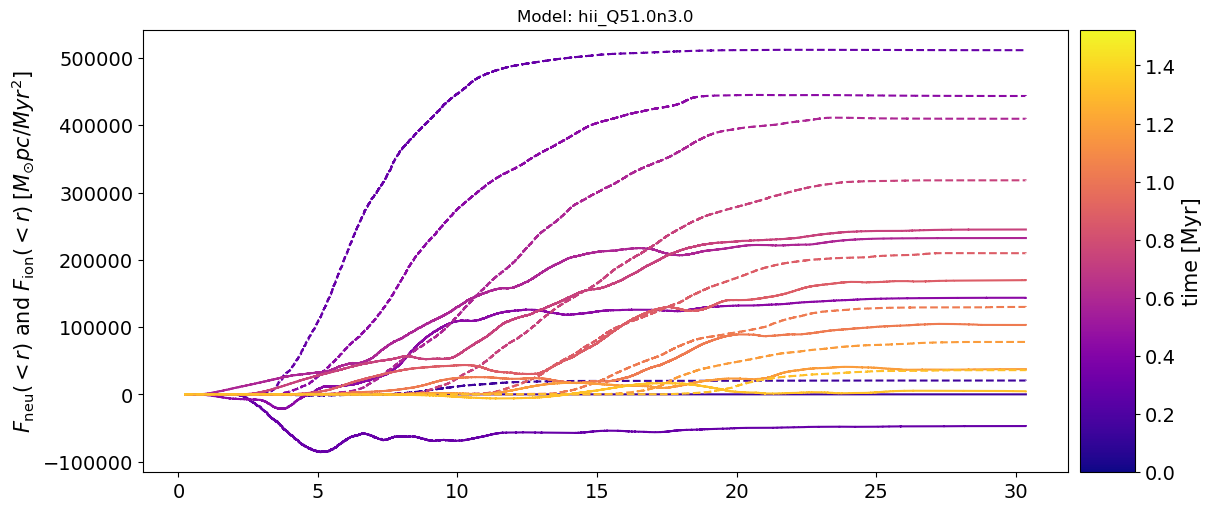

In [118]:


fig,axes= plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True,
                         gridspec_kw=dict(width_ratios=[0.5,0.03]))

tlim = s.par['time']['tlim']
norm = plt.Normalize(0, 0.5*tlim)
cmap = mpl.cm.plasma
for num in s.nums[10:100:10]:
    print(num, end=' ')
    dd, rr = get_data(s, num)
    
    axes[0].plot(rr['r'], -rr['Pion_r']*(s.u.length/s.u.time**2).value, c=cmap(norm(rr['time']*s.u.Myr)))
    axes[0].plot(rr['r'], -rr['Pneu_r']*(s.u.length/s.u.time**2).value, c=cmap(norm(rr['time']*s.u.Myr)), ls='--')
    # break

sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
# sm.set_array([])
plt.colorbar(sm, cax=axes[-1], label='time [Myr]')

axes[0].set_ylabel(r'$F_{\rm neu}(<r)$ and $F_{\rm ion}(<r)\;[M_{\odot} pc /Myr^2]$')
axes[1].set_label('code_time')
axes[0].set_title('Model: ' + s.basename)

Text(0.5, 1.0, 'Model: hii_Q51.0n3.0')

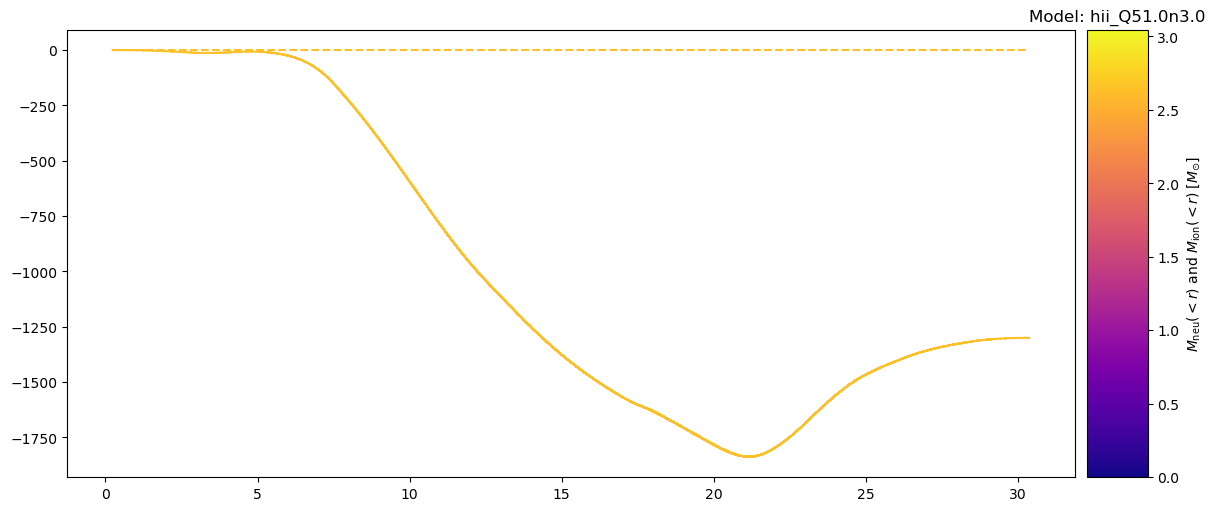

In [35]:
fig,axes = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True,
                         gridspec_kw=dict(width_ratios=[0.5,0.03]))

tlim = s.par['time']['tlim']
norm = plt.Normalize(0, tlim)
cmap = mpl.cm.plasma


axes[0].plot(rr['r'], rr['Pion_r'], c=cmap(norm(rr['time']*s.u.Myr)))
axes[0].plot(rr['r'], rr['Pneu_r'], c=l.get_color(), ls='--')
    # break

sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
# sm.set_array([])
plt.colorbar(sm, cax=axes[-1], label='time [Myr]')

plt.ylabel(r'$M_{\rm neu}(<r)$ and $M_{\rm ion}(<r)\;[M_{\odot}]$')
plt.title('Model: ' + s.basename)